# 4-二维的PCA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

# load data

In [2]:
data = sio.loadmat('data/ex7data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

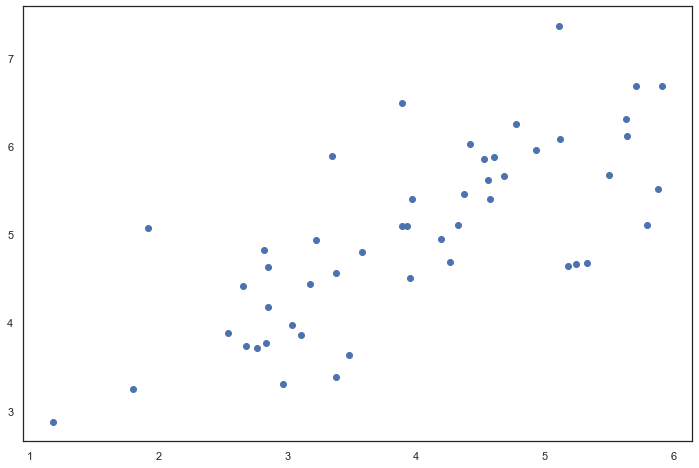

In [3]:
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
X.mean()

4.496035565920988

In [5]:
Xcopy = X.copy()
for col in range(Xcopy.shape[1]):
        Xcopy[:, col] = (Xcopy[:, col] - Xcopy[:, col].mean()) / Xcopy[:, col].std()

U, S, V = np.linalg.svd(Xcopy)
U,S,V

(array([[-0.16062799,  0.20796227, -0.14652229, ..., -0.19268034,
         -0.02076673,  0.14456323],
        [ 0.09899537, -0.07321697, -0.0837686 , ..., -0.3352168 ,
          0.09829793, -0.05031898],
        [-0.13143756, -0.10991088,  0.96994811, ..., -0.05868388,
          0.0051223 ,  0.01832722],
        ...,
        [-0.13021369, -0.35977595, -0.0639443 , ...,  0.844189  ,
          0.02604669,  0.02071472],
        [-0.03949686,  0.08978639,  0.00769737, ...,  0.03017854,
          0.99127302,  0.00425505],
        [ 0.15486642, -0.01872531,  0.01521929, ...,  0.01143763,
          0.0063552 ,  0.97991733]]),
 array([9.3153915 , 3.63641048]),
 array([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]]))

In [6]:
def pca(X):
    #normalize the features
    for col in range(X.shape[1]):
        X[:, col] = (X[:, col] - X[:, col].mean()) / X[:, col].std()

    #compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T @ X) / X.shape[0]

    # perform SVD
    U, S, V = np.linalg.svd(cov)

    return U, S, V


特征向量不唯一

In [7]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.70710678, -0.70710678],
         [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 matrix([[-0.70710678, -0.70710678],
         [-0.70710678,  0.70710678]]))

In [19]:
U[:,:1] @ U[:,:1].T

matrix([[0.5, 0.5],
        [0.5, 0.5]])

借助左奇异矩阵U， 可以将原始数据投影到一个较低维的空间中。

In [8]:
def project_data(X, U, k):
     U_reduced = U[:,:k]  
     return np.dot(X, U_reduced)

In [10]:
Z = project_data(X, U, 1)
Z

matrix([[ 1.49631261],
        [-0.92218067],
        [ 1.22439232],
        [ 1.64386173],
        [ 1.2732206 ],
        [-0.97681976],
        [ 1.26881187],
        [-2.34148278],
        [-0.02999141],
        [-0.78171789],
        [-0.6316777 ],
        [-0.55280135],
        [-0.0896816 ],
        [-0.5258541 ],
        [ 1.56415455],
        [-1.91610366],
        [-0.88679735],
        [ 0.95607375],
        [-2.32995679],
        [-0.47793862],
        [-2.21747195],
        [ 0.38900633],
        [-1.78482346],
        [ 0.05175486],
        [ 1.66512392],
        [ 0.50813572],
        [-1.23711018],
        [-1.17198677],
        [ 0.84221686],
        [-0.00693174],
        [-0.22794195],
        [-1.51309518],
        [ 1.33874082],
        [-0.5925244 ],
        [ 0.67907605],
        [-1.35298   ],
        [ 1.68749495],
        [-1.39235931],
        [ 2.55992598],
        [-0.27850702],
        [-0.97677692],
        [ 0.88820006],
        [ 1.29666127],
        [-0

反向转换步骤来恢复原始数据

In [11]:
def recover_data(Z, U, k):
    U_reduced = U[:, :k]
    return np.dot(Z, U_reduced.T)


In [12]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[-1.05805279, -1.05805279],
        [ 0.65208021,  0.65208021],
        [-0.86577611, -0.86577611],
        [-1.16238578, -1.16238578],
        [-0.90030292, -0.90030292],
        [ 0.69071588,  0.69071588],
        [-0.89718548, -0.89718548],
        [ 1.65567835,  1.65567835],
        [ 0.02120713,  0.02120713],
        [ 0.55275802,  0.55275802],
        [ 0.44666359,  0.44666359],
        [ 0.39088959,  0.39088959],
        [ 0.06341447,  0.06341447],
        [ 0.371835  ,  0.371835  ],
        [-1.10602429, -1.10602429],
        [ 1.35488989,  1.35488989],
        [ 0.62706042,  0.62706042],
        [-0.67604623, -0.67604623],
        [ 1.64752825,  1.64752825],
        [ 0.33795364,  0.33795364],
        [ 1.56798945,  1.56798945],
        [-0.27506901, -0.27506901],
        [ 1.26206077,  1.26206077],
        [-0.03659622, -0.03659622],
        [-1.17742041, -1.17742041],
        [-0.35930621, -0.35930621],
        [ 0.874769  ,  0.874769  ],
        [ 0.82871979,  0.828

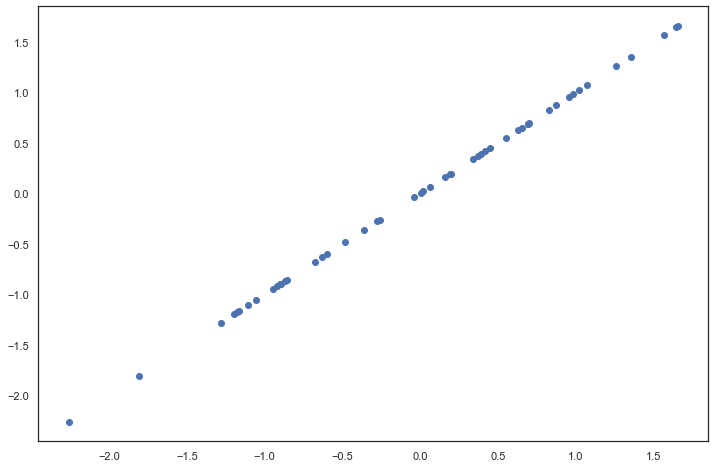

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()

第一主成分的投影轴基本上是数据集中的对角线。当我们将数据减少到一个维度时，我们失去了该对角线周围的变化，所以在再现中，一切都沿着该对角线。